## Problem Statement-

### Sales Prediction for Big Mart Outlets-

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 



### Data Dictionary-

We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

#to get the top 5 records of train
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [36]:
#to get dimensions of train data
train.shape

(8523, 12)

In [37]:
#to get informatio about train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [38]:
#statistical info
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>],
       [<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>],
       [<AxesSubplot:title={'center':'Item_Outlet_Sales'}>,
        <AxesSubplot:>]], dtype=object)

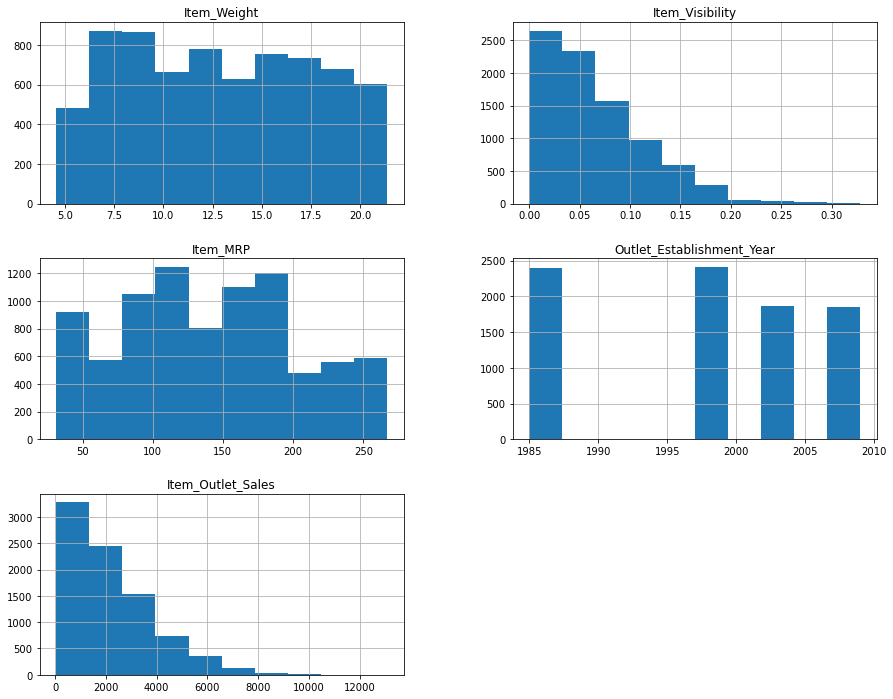

In [39]:
train.hist(figsize=(15,12))

Item_Weight                     AxesSubplot(0.125,0.125;0.133621x0.755)
Item_Visibility              AxesSubplot(0.285345,0.125;0.133621x0.755)
Item_MRP                      AxesSubplot(0.44569,0.125;0.133621x0.755)
Outlet_Establishment_Year    AxesSubplot(0.606034,0.125;0.133621x0.755)
Item_Outlet_Sales            AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

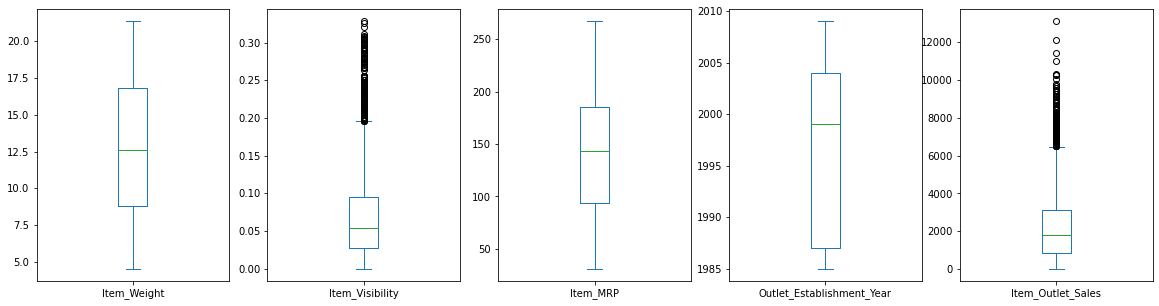

In [40]:
#boxplot for outliers
train.plot(kind='box', subplots=True, layout=(1,5), figsize=(20,5))

In Item_Outlet_Sales the outliers can remain there as in some season the sales jump abruptly.

In [41]:
#Removing outliers
train['Item_Visibility']=train[train['Item_Visibility']<0.18]['Item_Visibility']
print(train)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

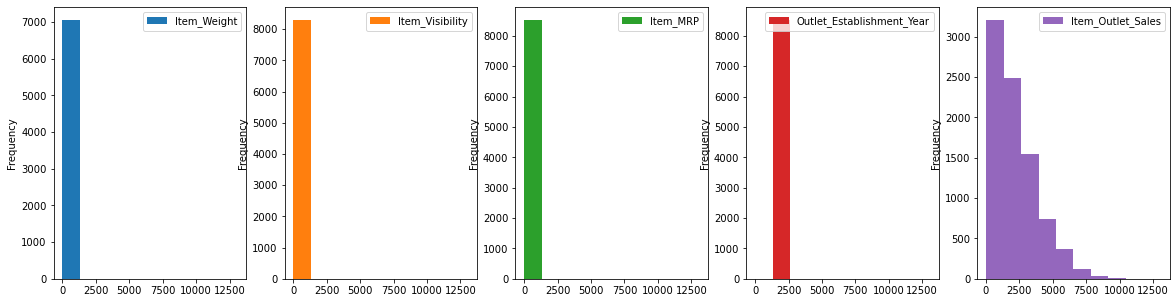

In [42]:
#univariate analysis
train.plot(kind='hist', subplots=True, layout=(1,5), figsize=(20,5))

The dataset contains similar data for ITEM VISIBILITY, ITEM MRP, and OUTLET ESTABLISHMENT YEAR. While ITEM OUTLET SALES can have some very high values, such as 10,000. Sales can increase exponentially during certain festival seasons. As a result, we will not drop or impute those high values.

<AxesSubplot:>

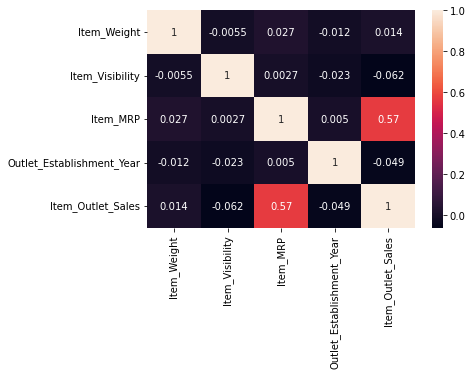

In [43]:
#bivariate Analysis
df=train.corr()
sns.heatmap(df, annot=True)

There is no high correlation factor (> 0.6) between any of the Input features and any of the Output features.

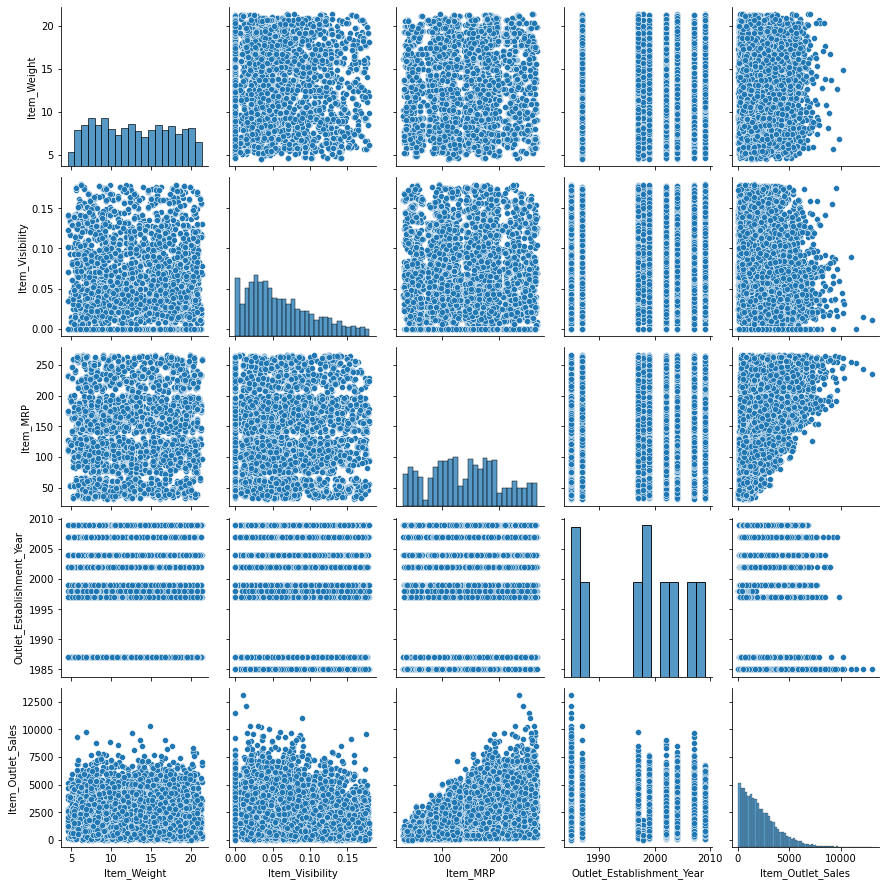

In [44]:
#Multivaiate Analysis
sns.pairplot(train)

find missing value of both the data set


In [45]:
print("\nTrain Dataset missing values:\n",train.isnull().sum())
print("\nTest Dataset missing values:\n",test.isnull().sum())


Train Dataset missing values:
 Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility               228
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Test Dataset missing values:
 Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


filling missing value of train data set

In [46]:
print(train['Item_Weight'].mode())
print(train['Outlet_Size'].mode())
print(train['Item_Visibility'].mean())

0    12.15
Name: Item_Weight, dtype: float64
0    Medium
Name: Outlet_Size, dtype: object
0.06181292964400252


In [47]:
train['Item_Weight']=train['Item_Weight'].fillna(12.15)
train['Outlet_Size']=train['Outlet_Size'].fillna('Medium')
train['Item_Visibility']=train['Item_Visibility'].fillna(0.06181292964400252)

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


filling Missing value for test dataset

In [49]:
test['Outlet_Size'] = test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].median())

In [50]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [51]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.500,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1


In [52]:
print("Total missing values in Train: ",train.isnull().sum().sum())
print("Total missing values in Test: ",test.isnull().sum().sum())

Total missing values in Train:  0
Total missing values in Test:  0


In [53]:
print(train)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

Use lable encoder and oneHotencoder

In [54]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
#New variable for outlet
train['Outlet'] = le.fit_transform(train['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    train[i] = le.fit_transform(train[i])

In [55]:
train = pd.get_dummies(train, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Outlet'])


In [56]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Item_Fat_Content_3             uint8
Item_Fat_Content_4             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Outlet_0                       uint8
Outlet_1                       uint8
Outlet_2                       uint8
Outlet_3                       uint8
O

In [57]:
X_train = train.drop(['Item_Outlet_Sales','Outlet_Identifier','Item_Identifier','Outlet_Establishment_Year'], axis=1)
y_train = train.Item_Outlet_Sales
print(X_train)
print(y_train)

      Item_Weight  Item_Visibility  Item_Type  Item_MRP  Item_Fat_Content_0  \
0           9.300         0.016047          4  249.8092                   0   
1           5.920         0.019278         14   48.2692                   0   
2          17.500         0.016760         10  141.6180                   0   
3          19.200         0.000000          6  182.0950                   0   
4           8.930         0.000000          9   53.8614                   0   
...           ...              ...        ...       ...                 ...   
8518        6.865         0.056783         13  214.5218                   0   
8519        8.380         0.046982          0  108.1570                   0   
8520       10.600         0.035186          8   85.1224                   0   
8521        7.210         0.145221         13  103.1332                   0   
8522       14.800         0.044878         14   75.4670                   0   

      Item_Fat_Content_1  Item_Fat_Content_2  Item_

In [58]:
X_train.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,Outlet_Location_Type_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.30,0.016047,4,249.8092,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,14,48.2692,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0.016760,10,141.6180,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0.000000,6,182.0950,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,9,53.8614,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [59]:
test.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.500,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [60]:
test['Outlet'] = le.fit_transform(test['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type','Outlet_Type','Outlet']
le = LabelEncoder()
for j in var_mod:
    test[j] = le.fit_transform(test[j])

In [61]:
test = pd.get_dummies(test,columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Outlet'])
test.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDW58,20.750,0.007565,13,107.8622,OUT049,1999,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,FDW14,8.300,0.038428,4,87.3198,OUT017,2007,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,NCN55,14.600,0.099575,11,241.7538,OUT010,1998,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,FDQ58,7.315,0.015388,13,155.0340,OUT017,2007,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,FDY38,12.500,0.118599,4,234.2300,OUT027,1985,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [62]:
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Item_Fat_Content_3             uint8
Item_Fat_Content_4             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Outlet_0                       uint8
Outlet_1                       uint8
Outlet_2                       uint8
Outlet_3                       uint8
Outlet_4                       uint8
O

In [63]:
X_test=test.drop(['Outlet_Identifier','Item_Identifier','Outlet_Establishment_Year'], axis=1)

print(X_test)


      Item_Weight  Item_Visibility  Item_Type  Item_MRP  Item_Fat_Content_0  \
0          20.750         0.007565         13  107.8622                   0   
1           8.300         0.038428          4   87.3198                   0   
2          14.600         0.099575         11  241.7538                   0   
3           7.315         0.015388         13  155.0340                   0   
4          12.500         0.118599          4  234.2300                   0   
...           ...              ...        ...       ...                 ...   
5676       10.500         0.013496         13  141.3154                   0   
5677        7.600         0.142991         15  169.1448                   0   
5678       10.000         0.073529          8  118.7440                   0   
5679       15.300         0.000000          3  214.6218                   0   
5680        9.500         0.104720          3   79.7960                   0   

      Item_Fat_Content_1  Item_Fat_Content_2  Item_

In [64]:
import warnings
warnings.filterwarnings('ignore')

In [65]:
#Model building
#applying Linear regression
from sklearn.linear_model import  LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(y_pred)

[1837.97312006 1476.4597521  1880.97536819 ... 1825.06945297 3573.22012865
 1265.33022102]


In [66]:
#Decision Tree

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(y_pred)


[1673.98398729 1349.51290433  471.30684669 ... 1892.06614452 3845.49167395
 1349.51290433]


In [67]:
#Applying Random Forest
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(y_pred)



[1648.94014944 1376.81786528  602.95947408 ... 1942.53601906 3686.36985346
 1304.78289996]


In [68]:
#Applying SVM
from sklearn.svm import SVR
svr = SVR()
fitSVR = svr.fit(X_train, y_train)
y_pred = fitSVR.predict(X_test)

print(y_pred)

[1606.07342303 1417.74620514 2569.16739669 ... 1712.48685237 2499.17422526
 1356.75369414]


#submission file
test=pd.read_csv("test.csv")
submission_file=pd.read_csv('sample_submission.csv')
submission_file['Item_Identifier'] = test['Item_Identifier']
submission_file['Outlet_Identifier'] = test['Outlet_Identifier']


submission_file['Item_Outlet_Sales'] = y_pred
submission_file.to_csv('sample_submission.csv', index=False)

submission_file['Item_Outlet_Sales'] = submission_file['Item_Outlet_Sales']

submission_file.to_csv('sample_submission4.csv', index=False)

Result-
Submission Score:-

    1)linear regrassion-negative value
    
    2)Decision tree-1168.91795611313
    
    3)SVM-1591.75608085973
    
    4)Random Forest-1152.99649322587


Project_Rank_1244